In [3]:
from random import *
import numpy as nm
from scipy.stats import truncnorm

seed (None)

## Global variables
global N
global STATE0, STATE1
global BASE, OPT
global PDM, GREEDY, GENERIC
global iCache, dCache


## Instantiating global variables
N = 100000
## BASE list has all the base cycle values that were generated
## OPT list has the optimized values for that cycle post optimization

BASE = []
OPT = []
STATE0 = {'meanCycle': 50000, 'stdDev': 5000, 'min': 30000, 'max': 70000, 'base': BASE, 'opt': OPT}
STATE1 = {'meanCycle': 5000, 'stdDev': 500, 'min': 1000, 'max': 7000, 'base': BASE, 'opt': OPT}

#PDM = {'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
#GREEDY = {'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}

#iCache = {'lat': 250, 'stdDev': 10, 'quality': 0.2}
#dCache = {'lat': 400, 'stdDev': 50, 'quality': 0.3}

## name key added to print the name
PDM = {'name': 'PDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
GREEDY = {'name': 'GREEDY', 'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}
GENERIC = {'name': 'GENERIC', 'freqSampling': 20000, 'lat': 5000, 'stdDev': 1000, 'quality': 1}

## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.6}
dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0.1}
ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.1}
IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.2}

## techList is the list containing all the techniques 
## it is fed into the getOptCycles to get the configuration time for the max of the techniques
techList = [iCache, dCache, ROB, IQ]

def state_0():
    print "State_0"
    ## Lets take that the mean values of cycles in state0 is 50000 and std Dev is 5000
    global STATE0, BASE, OPT
    
    #cycle = STATE0['meanCycle']
    #stdDev = STATE0['stdDev']
    
    ## Creating a dictionary of list to keep track of our base cycles and optimized cycles
    ## base and opt are the lists corressponding to base and optimized cycles
    #base = []
    #opt = []
    
    #state0 = {'BASE': base, 'OPT': opt}
    
    ## Creating a base cycle and appending it to the list base
    
    ## baseCycles for the state at the current execution time
    ## random number from the normal distribution with mean=STATE1['meanCycle']
    ## and stdDev = STATE1['stdDev']
    #baseCycles = round(nm.random.normal(STATE0['meanCycle'], STATE0['stdDev']))
    baseCycles = round(getTruncatedNormal(STATE0['meanCycle'], STATE0['stdDev'],\
                                         STATE0['min'], STATE0['max']))
    BASE.append(baseCycles)
    
    ## For the first iteration we need to start with time=0
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        ## startCycles for next iteration is the baseCycle from previous state
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    ## 
    #for i in range(len(BASE)):
        #print "BASE[%d] = %f" %(i, BASE[i])
    
    if random() < 0.9:
        return state_1
    else:
        return state_0

def state_1():
    print "State_1"
    
    ##
    global STATE1, BASE, OPT
    
    ## baseCycles for the state at the current execution time
    ## random number from the normal distribution with mean=STATE1['meanCycle']
    ## and stdDev = STATE1['stdDev']
    #baseCycles = round(nm.random.normal(STATE1['meanCycle'], STATE1['stdDev']))
    baseCycles = round(getTruncatedNormal(STATE1['meanCycle'], STATE1['stdDev'],\
                                         STATE1['min'], STATE1['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    #for i in range(len(BASE)):
        #print "BASE[%d]= %f" %(i, BASE[i])
        
    if random() > 0.3:
        return state_0
    else:
        return state_1
    
    
## Other functions
## get the techniques that are active for a given simulation
def getActiveTech(x):
    if (x == 0):
        return (0, 0, 0, 0)
    elif (x==1):
        return (0, 0, 0, 1)
    elif (x==2):
        return (0, 0, 1, 0)
    elif (x==3):
        return (0, 0, 1, 1)
    elif (x==4):
        return (0, 1, 0, 0)
    elif (x==5):
        return (0, 1, 0, 1)
    elif (x==6):
        return (0, 1, 1, 0)
    elif (x==7):
        return (0, 1, 1, 1)
    elif (x==8):
        return (1, 0, 0, 0)
    elif (x==9):
        return (1, 0, 0, 1)
    elif (x==10):
        return (1, 0, 1, 0)
    elif (x==11):
        return (1, 0, 1, 1)
    elif (x==12):
        return (1, 1, 0, 0)
    elif (x==13):
        return (1, 1, 0, 1)
    elif (x==14):
        return (1, 1, 1, 0)
    elif (x==15):
        return (1, 1, 1, 1)

###############################################

## sum() => internal function can also be used
## Usage sum(list)
def getTotalCycles(list1, index):
    tot = 0
    for i in range(index):
        tot = tot + list1[i]
    return tot

###############################################

## getOptCycles takes in input basecycle, time at which the state started,
## method and technique applied and returns the optimized time for that state, that method 
## and technique

## baseCycles => is generated randomly based on mean and variance for a state
## startCycles => is the time at which the previous state finished. Start of this state in globale
## time
## method => method, PDM, GREEDY, GENERIC
## method['lat'] => gives the latency time for the method
## techList => technique applied, iCache, dCache, ROB etc. Used to get config time for 
##          all the techniques and max will be used for process
## activeTech ==> is the tuple with the active techniques 

def getOptCycles(baseCycles, startCycles, method, techList, activeTech):
    #print "method= %s\n%s['freqSampling'] = %d" %(method, method, method['freqSampling'])
    #print "Type of Method = %s" %(type(method))
    samplingRate = method['freqSampling']
    
    ## samplingTime is the time in the state where the technique will sample for optimisation
    ## If the startCyles is 0 => Starting the simulation
    ## startCycles is divisible by sampling rate => We discussed to go on to the next 
    ## sampling cycle
    if (startCycles % samplingRate == 0 or startCycles == 0):
        samplingTime = samplingRate
    elif (startCycles % samplingRate != 0):
        ## Since we know the starting time, we divide it by samplingRate to see how much 
        ## it is above the samplingRate. Now we subtract it from the samplingRate to get 
        ## how further down will the next sampling be done.
        ## We multiply 2*samplingRate since the program will take at least freqSampling
        ## to optimize.
        #samplingTime = startCycles + (samplingRate - nm.remainder(startCycles, samplingRate))
        samplingTime = (2*samplingRate) - nm.remainder(startCycles, samplingRate)
    
    if (samplingTime > baseCycles):
        print "Sampling Time greater than baseCycles ==> No optimisation possible\n"
        print "baseCycles= %d\nsamplingTime= %d\n" %(baseCycles, samplingTime)
        return baseCycles
    else:
        ## globalSamplingTime => Gives the sampling time with respect to global time
        globalSamplingTime = startCycles + samplingTime

        ## optTime => Represents the time taken by method to optimize
        optTime = round(nm.random.normal(method['lat'], method['stdDev']))

        ## configTimeList => Represents the list of time taken by technique to configure
        #configTime = round(nm.random.normal(tech['lat'], tech['stdDev']))
        configTimeList = []
        for ii in range(len(techList)):
            configTimeList.append(round(nm.random.normal(techList[ii]['lat'], techList[ii]['stdDev'])))
        
        ## configTime is the max of all the cpnfiguration times required, since they can happen in parallel
        configTime = max(configTimeList)

        ## timeleft => Represents the time left after sampling and optimisation and configuration time
        timeLeft = baseCycles - (samplingTime + optTime + configTime)
        if (timeLeft < 0):
            print "Cannot optimize because there is no time left for optimisation\n"
            print "timeLeft < 0\n"
            print "baseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
        \nconfigTime= %d\ntimeLeft= %d\n"\
        % (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
           configTime, timeLeft)
            return baseCycles
        
        else:
            ## this time is now optimized according to the method
            ##opt_timeLeft = round(method['quality']*timeLeft)
            a1 = activeTech[0]
            a2 = activeTech[1]
            a3 = activeTech[2]
            a4 = activeTech[3]
            opt_timeLeft = round(timeLeft*method['quality']*(a1*iCache['cycleRatio']*(1-iCache['quality']) + \
                                          a2*dCache['cycleRatio']*(1-dCache['quality']) + \
                                          a3*ROB['cycleRatio']*(1-ROB['quality']) + \
                                          a4*IQ['cycleRatio']*(1-IQ['quality']) \
                                          ) + \
                                timeLeft*(1-(a1*iCache['cycleRatio'] +\
                                           a2*dCache['cycleRatio'] +\
                                           a3*ROB['cycleRatio'] +\
                                           a4*IQ['cycleRatio'])\
                                        )\
                                ) 

            newStateCycles = samplingTime + optTime + configTime + opt_timeLeft

            print "\nbaseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
            \nconfigTime= %d\ntimeLeft= %d\nopt_timeLeft=%d\nnewStateCycles= %d\n"\
            % (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
               configTime, timeLeft, opt_timeLeft, newStateCycles)
            
            print "\tiCache= %d, %d\n\tdCAche= %d, %d\n\tROB= %d, %d\n\tIQ= %d, %d\n" \
            %(round(method['quality']*timeLeft*a1*iCache['cycleRatio']*(1-iCache['quality'])), round(timeLeft*iCache['cycleRatio']),\
              round(method['quality']*timeLeft*a2*dCache['cycleRatio']*(1-dCache['quality'])), round(timeLeft*dCache['cycleRatio']),\
              round(method['quality']*timeLeft*a3*ROB['cycleRatio']*(1-ROB['quality'])), round(timeLeft*ROB['cycleRatio']),\
              round(method['quality']*timeLeft*a4*IQ['cycleRatio']*(1-IQ['quality'])), round(timeLeft*IQ['cycleRatio'])\
             )

            ## returning the optimized time the state takes because of the technique and method applied
            return newStateCycles

#######################################################    

## getTruncatedNormal gets random number by normal distribution within 'low' and 'up' given
## the mean and standard deviation of the numbers.
## rvs ==> is random variable continuous 
## Refer ==> https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

def getTruncatedNormal (mean, stdDev, low, up):
    return truncnorm ((low-mean)/stdDev, (up-mean)/stdDev, loc=mean, scale=stdDev).rvs()

#print "truncated Normal number between %d and %d with mean=%d and stdDev = %d is %d"\
#% (numMin, numMax, numMean, numSd, getTruncatedNormal(numMean, numSd, numMin, numMax).rvs() )    
################
    
state = state_0

count = 0

while state:
    state = state()
    ## when the sum of base goes above N we stop
    ## Stops close to the maximum number of cycles that we want to execute
    if sum(BASE) > N:
        ## state => None. while loop stops
        state = None


print "\ntype of BASE = %s\n" %(type(BASE))
#totalBaseCycles = getTotalCycles(BASE, len(BASE))

for i in range(len(BASE)):
    print "BASE[%d]= %d, OPT[%d]=%d" %(i, BASE[i], i, OPT[i])
    
#print "\nTotal Base Cycles = %d" %(totalBaseCycles)

### 
#getOptCycles(BASE[1], BASE[0], PDM, iCache)

print "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
% (sum(BASE), sum(OPT), sum(BASE)/sum(OPT))


State_0

baseCycles= 51575
startCycles= 0
samplingTime= 2000
globalSamplingTime=2000
optTime= 473            
configTime= 462
timeLeft= 48640
opt_timeLeft=36772
newStateCycles= 39707

	iCache= 18678, 29184
	dCAche= 0, 4864
	ROB= 3502, 4864
	IQ= 0, 9728

State_1

baseCycles= 5638
startCycles= 51575
samplingTime= 2425
globalSamplingTime=54000
optTime= 478            
configTime= 457
timeLeft= 2278
opt_timeLeft=1722
newStateCycles= 5082

	iCache= 875, 1367
	dCAche= 0, 228
	ROB= 164, 228
	IQ= 0, 456

State_0

baseCycles= 44554
startCycles= 57213
samplingTime= 2787
globalSamplingTime=60000
optTime= 486            
configTime= 461
timeLeft= 40820
opt_timeLeft=30860
newStateCycles= 34594

	iCache= 15675, 24492
	dCAche= 0, 4082
	ROB= 2939, 4082
	IQ= 0, 8164


type of BASE = <type 'list'>

BASE[0]= 51575, OPT[0]=39707
BASE[1]= 5638, OPT[1]=5082
BASE[2]= 44554, OPT[2]=34594

Total Base = 101767, Total Opt = 79383
Total Speed Up = 1.281975


In [9]:
## Once BASE is created, we can use it to get speedup for 
## various METHODS and TECHNIQUES

## create OPT list for each Method
global PDM_OPT, GREEDY_OPT, GENERIC_OPT

## name key added to print the name
PDM = {'name': 'PDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
GREEDY = {'name': 'GREEDY', 'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}
GENERIC = {'name': 'GENERIC', 'freqSampling': 20000, 'lat': 5000, 'stdDev': 1000, 'quality': 1}

## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.6}
dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0.1}
ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.1}
IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.2}

## techList is the list containing all the techniques 
## it is fed into the getOptCycles to get the configuration time for the max of the techniques
techList = [iCache, dCache, ROB, IQ]

PDM_OPT = []
GREEDY_OPT = []
GENERIC_OPT = []

## Create a list of methods, do not create strings 'PDM' XX
METHOD = [PDM, GREEDY, GENERIC]

## This list is not need as we have encoded the techniques in 
## the getOptCycles using the getActiveTech function
#TECH = [iCache, dCache]

## Create OPT_LIST contains the speedup for all the variations of techniques
OPT_LIST = [PDM_OPT, GREEDY_OPT, GENERIC_OPT]

## interList is the list to store intermediate optimisation cycles 
## for calculating the speedup 
interList = []

for i in range(len(METHOD)):
    for j in range(16):
        iterList = []
        for b in range(len(BASE)):
            #print "Ooptimisation Method = %s , Tech = %s" %(METHOD[j], TECH[i])
            #print "Type of method = %s type of PDM variable=%s\nb=%d type of b=%s" \
            #%(type(METHOD[j]), type(PDM), b, type(b))
            if (b==0):
                optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, 0), METHOD[i], techList, getActiveTech(j))
            else:
                optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, b), METHOD[i], techList, getActiveTech(j))
            
            #optList = iterList
            #print "\nname= %s, optList len = %d\n" %(METHOD_LIST[j], len(optList))
            iterList.append(optCycle)
            
        
        print "\n############################\n"
        print "Ooptimisation Method = %s , Tech = %d" %(METHOD[i]['name'], j)
        for k in range(len(BASE)):
            print "BASE[%d]= %d, iterList[%d]=%d" %(k, BASE[k], k, iterList[k])
        print "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
        % (sum(BASE), sum(iterList), sum(BASE)/sum(iterList))
        print "\n############################\n"
        
        speedUp = sum(BASE)/sum(iterList)
        optList = OPT_LIST[i]
        optList.append(speedUp)

## PDM_OPT and GREEDY_OPT will have the speedup's according to the activated techniques 0000, 0001, 0010..1111
## Format the list to print only upto 4 decimal places
formatted_PDM_OPT = ['%.4f' % elem for elem in PDM_OPT]
formatted_GREEDY_OPT = ['%.4f' % elem for elem in GREEDY_OPT]
formatted_GENERIC_OPT = ['%.4f' % elm for elm in GENERIC_OPT]
print "PDM= %s\nGREEDY= %s\nGENERIC= %s" %(formatted_PDM_OPT, formatted_GREEDY_OPT, formatted_GENERIC_OPT)
        


baseCycles= 51575
startCycles= 0
samplingTime= 2000
globalSamplingTime=2000
optTime= 503            
configTime= 426
timeLeft= 48646
opt_timeLeft=48646
newStateCycles= 51575

	iCache= 0, 29188
	dCAche= 0, 4865
	ROB= 0, 4865
	IQ= 0, 9729


baseCycles= 5638
startCycles= 51575
samplingTime= 2425
globalSamplingTime=54000
optTime= 513            
configTime= 434
timeLeft= 2266
opt_timeLeft=2266
newStateCycles= 5638

	iCache= 0, 1360
	dCAche= 0, 227
	ROB= 0, 227
	IQ= 0, 453


baseCycles= 44554
startCycles= 57213
samplingTime= 2787
globalSamplingTime=60000
optTime= 504            
configTime= 446
timeLeft= 40817
opt_timeLeft=40817
newStateCycles= 44554

	iCache= 0, 24490
	dCAche= 0, 4082
	ROB= 0, 4082
	IQ= 0, 8163


############################

Ooptimisation Method = PDM , Tech = 0
BASE[0]= 51575, iterList[0]=51575
BASE[1]= 5638, iterList[1]=5638
BASE[2]= 44554, iterList[2]=44554

Total Base = 101767, Total Opt = 101767
Total Speed Up = 1.000000

############################


baseCycles= 5

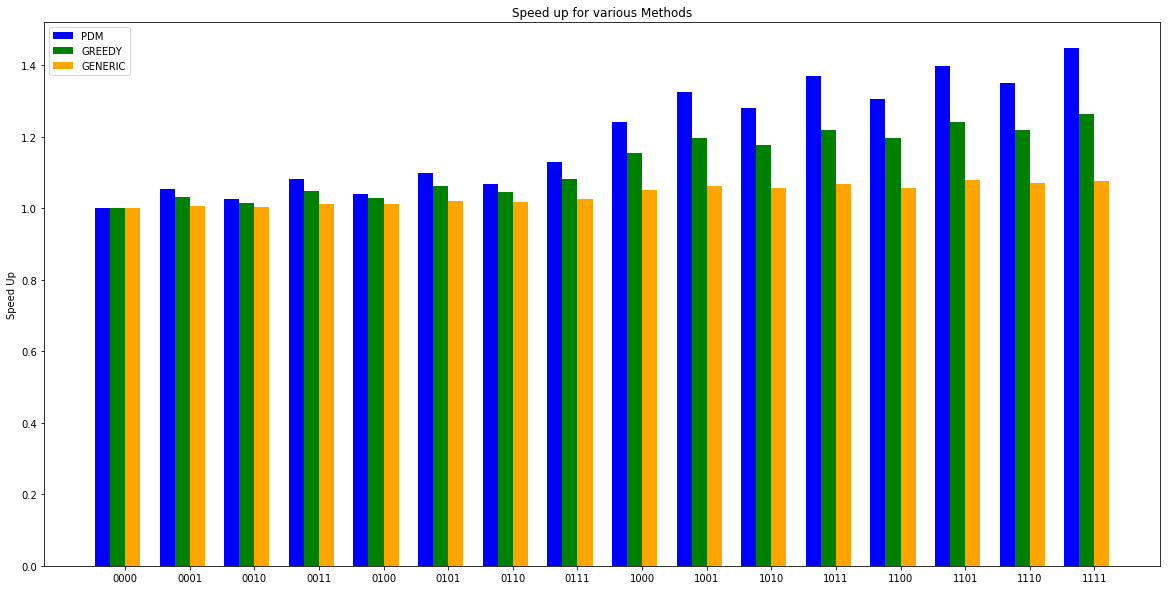

In [22]:
## taken from http://matplotlib.org/examples/api/barchart_demo.html
import matplotlib.pyplot as plt
import numpy as np

N = 16
## making the multiplier bigger reduces the size of bar's
index = 1.5*np.arange(N) # location of groups
width = 0.35 #width of each bar

#fig, ax = plt.subplots()
#rect1 = ax.bar(index, PDM_OPT, width, color='b')
#rect2 = ax.bar(index+width, GREEDY_OPT, width, color='g')
#rect3 = ax.bar(index+2*width, GENERIC_OPT, width, color='r')
## Adding labels and titles
#ax.set_ylabel('Speed Up')
#ax.set_title('Speed up for various Methods')
#ax.set_xticks(index+1.5*width)
#ax.set_xticklabels(('0000', '0001', '0010', '0011',\
#                    '0100', '0101', '0110', '0111',\
#                    '1000', '1001', '1010', '1011',\
#                    '1100', '1101', '1110', '1111'))
#ax.legend((rect1[0], rect2[0], rect3[0]), ('PDM', 'GREEDY', 'GENERIC'))

plt.figure(figsize=(20,10))
rect1 = plt.bar(index, PDM_OPT, width, color='b')
rect2 = plt.bar(index+width, GREEDY_OPT, width, color='g')
rect3 = plt.bar(index+2*width, GENERIC_OPT, width, color='orange')

tickLabel = (('0000', '0001', '0010', '0011',\
            '0100', '0101', '0110', '0111',\
            '1000', '1001', '1010', '1011',\
            '1100', '1101', '1110', '1111'))

## Adding labels and titles
plt.ylabel('Speed Up')
plt.title('Speed up for various Methods')
plt.xticks(index+1.5*width, tickLabel)

plt.legend((rect1[0], rect2[0], rect3[0]), ('PDM', 'GREEDY', 'GENERIC'))

plt.show()